<a href="https://www.kaggle.com/code/mirzaabbasuddin/insurance-claim-prediction?scriptVersionId=137430183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
#loading the train dataset
df = pd.read_csv('/kaggle/input/sample-insurance-claim-prediction-dataset/insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


**Data Preprocessing**

In [2]:
df.shape

(1338, 8)

In [3]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


**Exploratory Data Analysis(EDA)**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


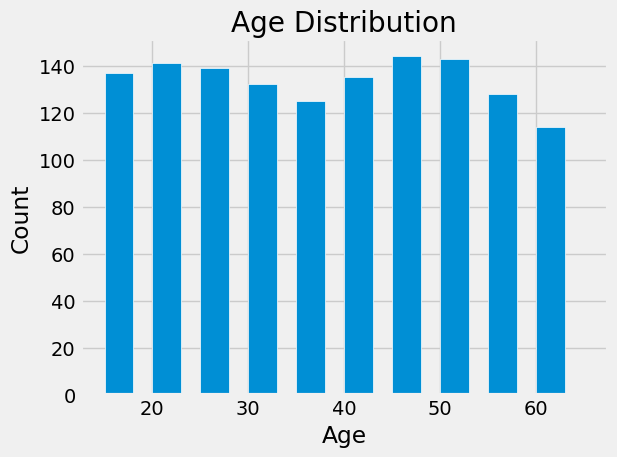

In [6]:
plt.style.use("fivethirtyeight")
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(df['age'],bins=[15,20,25,30,35,40,45,50,55,60,65],width=3, edgecolor='white')
plt.tight_layout()
plt.show()

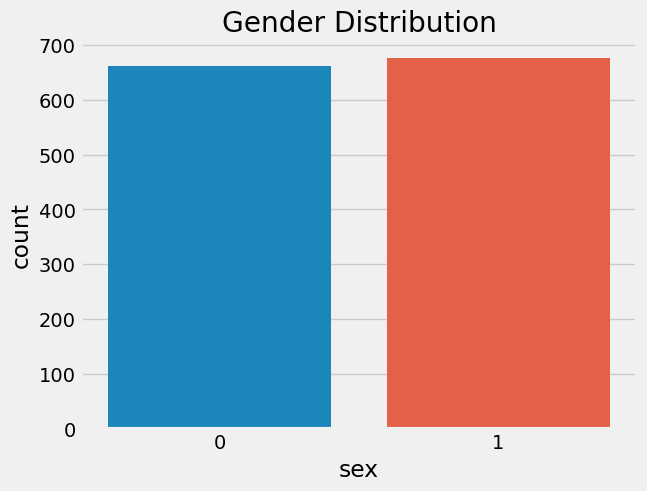

In [7]:
plt.title('Gender Distribution')
sns.countplot(x= 'sex', data= df,saturation = .75)
plt.show()

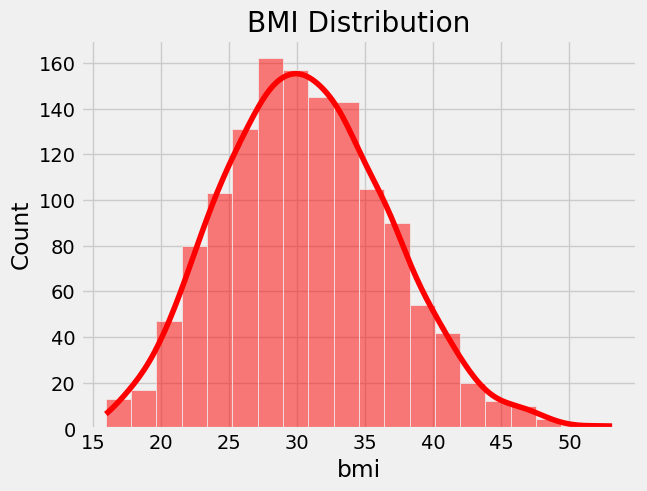

In [8]:
plt.title("BMI Distribution")
sns.histplot(df['bmi'],bins = 20,kde = True,color = 'red')
plt.show()

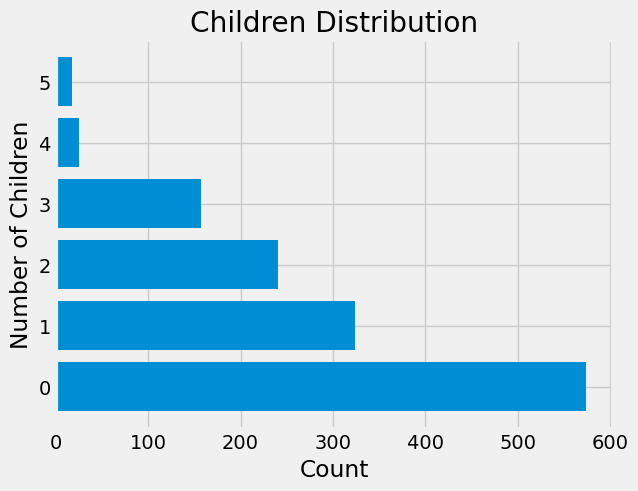

In [9]:
plt.title('Children Distribution')
children_counts = df['children'].value_counts()
plt.barh(children_counts.index, children_counts)
plt.xlabel('Count')
plt.ylabel('Number of Children')
plt.show()

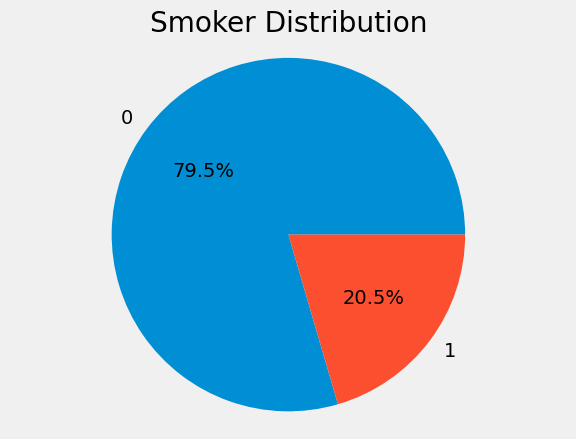

In [10]:
plt.title('Smoker Distribution')
smoker_count = df['smoker'].value_counts()
plt.pie(smoker_count, labels=smoker_count.index, autopct='%.1f%%')
plt.axis('equal')
plt.show()

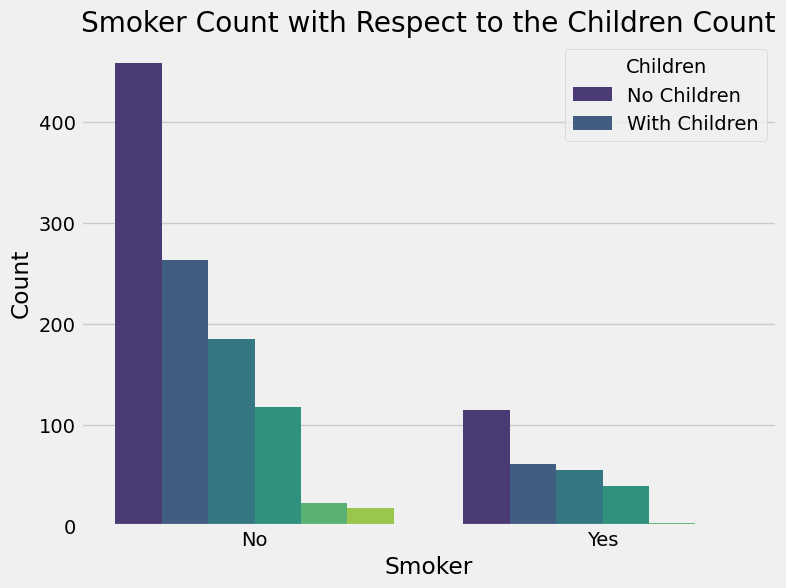

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Smoker Count with Respect to the Children Count')
sns.countplot(x=df.smoker, hue=df.children, palette='viridis')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Children', labels=['No Children', 'With Children'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


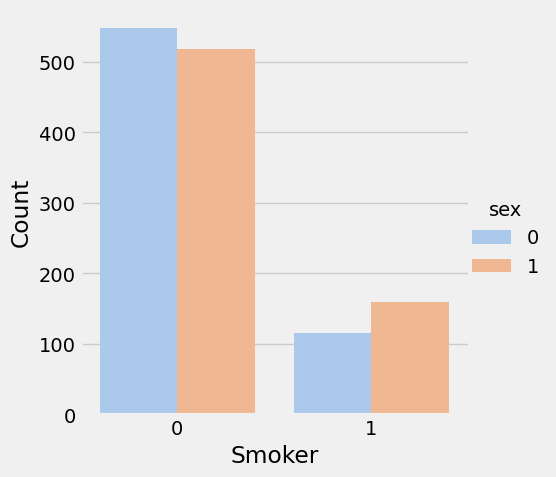

In [12]:
# Smoker Count with Gender
sns.catplot(x="smoker", kind="count", hue='sex', data=df, palette='pastel')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

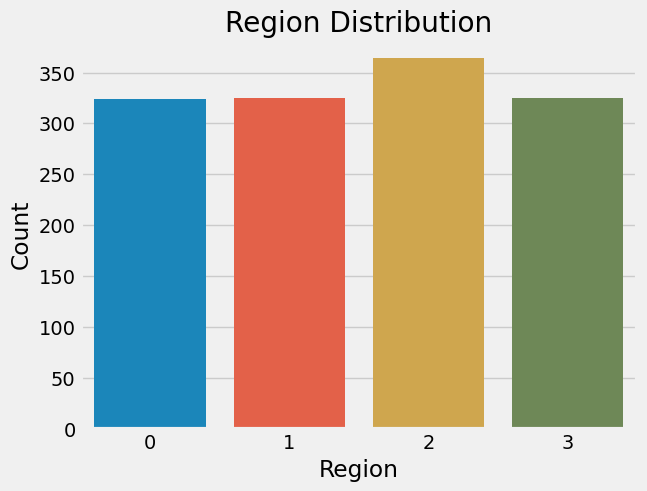

In [13]:
plt.title('Region Distribution')
sns.countplot(x = 'region', data = df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

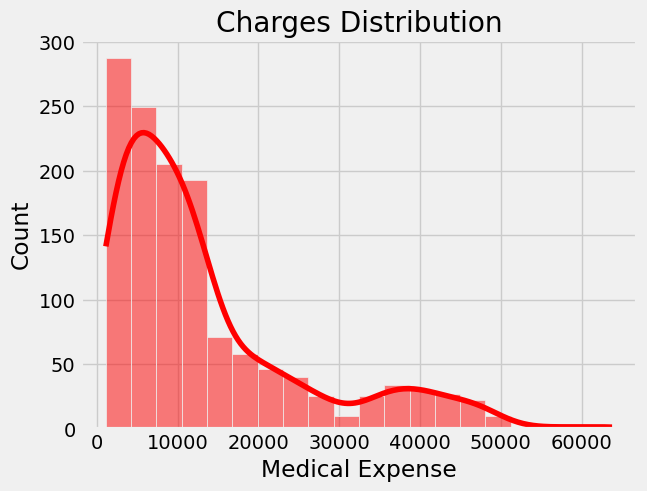

In [14]:
plt.title('Charges Distribution')
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

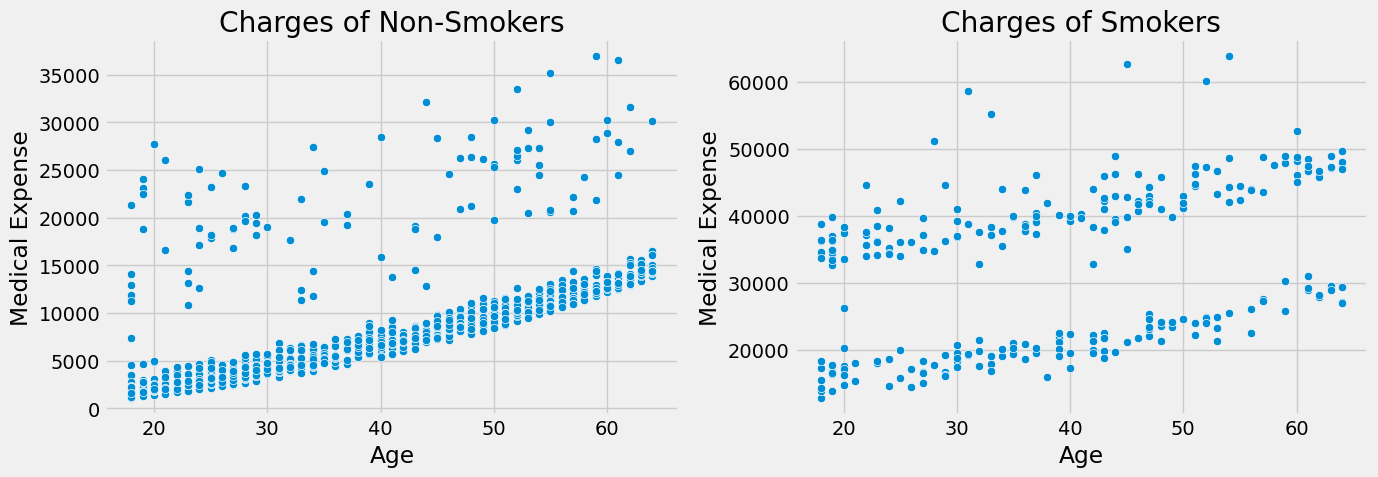

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot for charges of non-smokers
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 0], ax=axes[0])
axes[0].set_title('Charges of Non-Smokers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Medical Expense')

# Scatter plot for charges of smokers
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 1], ax=axes[1])
axes[1].set_title('Charges of Smokers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Medical Expense')

plt.tight_layout()
plt.show()

In [16]:
# correlation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


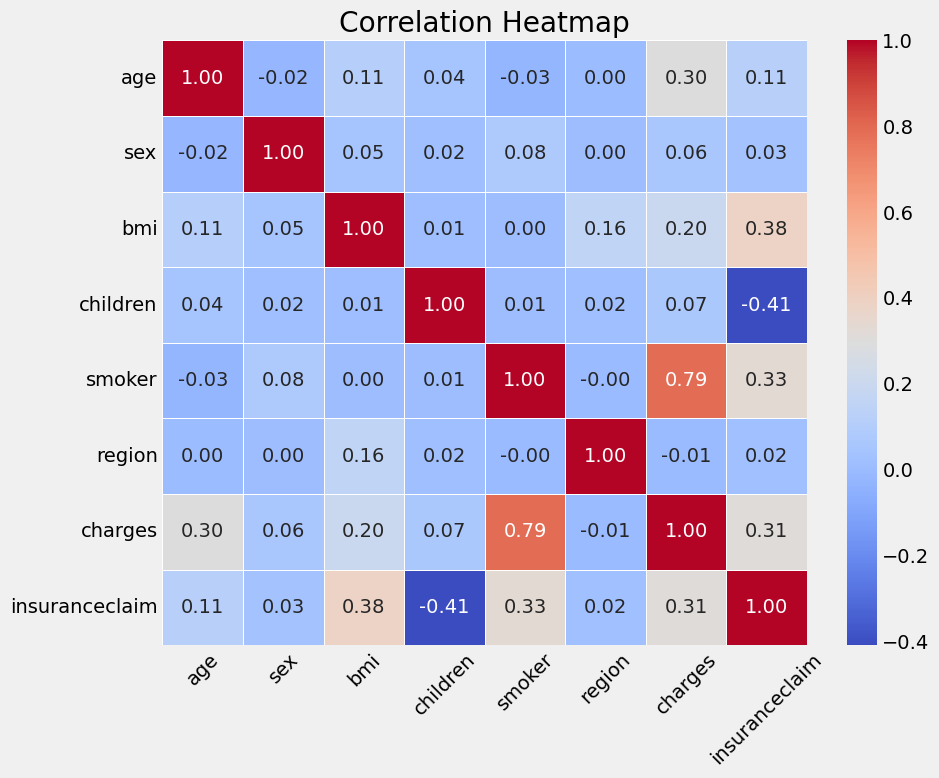

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
# taking our input data and output
input_ = df.drop(columns = ['insuranceclaim'])
output = df['insuranceclaim']

In [19]:
# spliting the dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(input_,output,random_state = 10)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 7)
(335, 7)
(1003,)
(335,)


**Applying Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [22]:
# traing the model with train data

model.fit(X_train,y_train)

LogisticRegression()

In [23]:
model.score(X_test,y_test)

0.7671641791044777

In [24]:
y_predicted = model.predict(X_test)

**Generating Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[ 93  57]
 [ 21 164]]


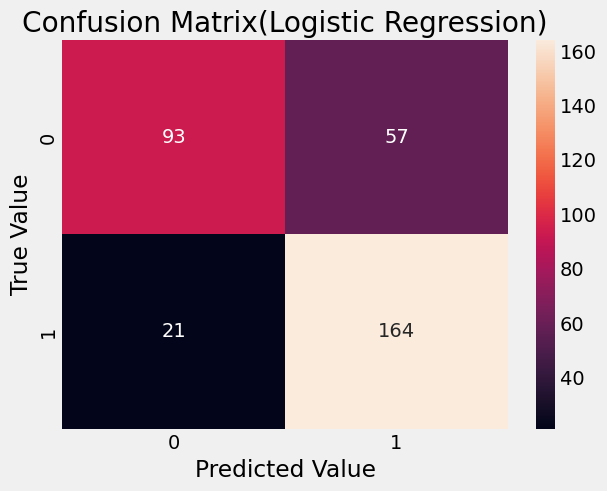

In [26]:
plt.title("Confusion Matrix(Logistic Regression)")
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()


**Classification Report**

In [27]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.62      0.70       150
           1       0.74      0.89      0.81       185

    accuracy                           0.77       335
   macro avg       0.78      0.75      0.76       335
weighted avg       0.78      0.77      0.76       335



**Applying KNN Classifier**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [30]:
knn.score(X_test,y_test)

0.608955223880597

In [31]:
# classification report
y_predicted = knn.predict(X_test)
cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.59      0.43      0.50       150
           1       0.62      0.75      0.68       185

    accuracy                           0.61       335
   macro avg       0.60      0.59      0.59       335
weighted avg       0.60      0.61      0.60       335



**Applying Naive Bayes Classifier**

In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [33]:
nb.fit(X_train,y_train)

GaussianNB()

In [34]:
nb.score(X_test,y_test)

0.8059701492537313

In [35]:
# classification report
y_predicted = nb.predict(X_test)
cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       150
           1       0.91      0.72      0.80       185

    accuracy                           0.81       335
   macro avg       0.82      0.82      0.81       335
weighted avg       0.83      0.81      0.81       335



**Applying Decision Tree Classifier**

In [36]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [37]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
clf.score(X_test,y_test)

0.9671641791044776

In [39]:
# classification report
y_predicted = clf.predict(X_test)
cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       150
           1       0.97      0.97      0.97       185

    accuracy                           0.97       335
   macro avg       0.97      0.97      0.97       335
weighted avg       0.97      0.97      0.97       335



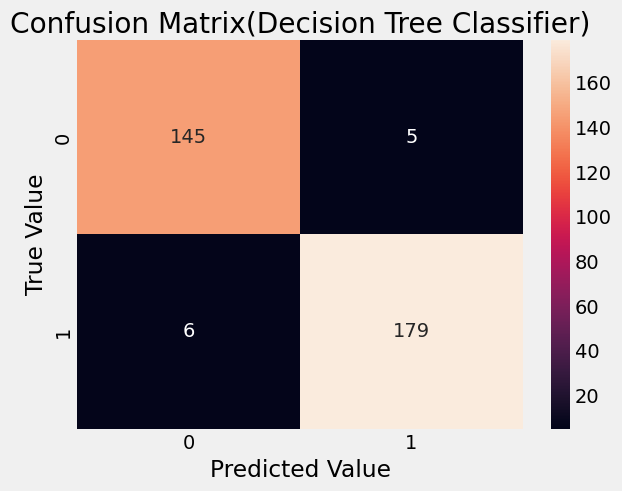

In [40]:
# consution matrix
cm = confusion_matrix(y_test,y_predicted)
plt.title("Confusion Matrix(Decision Tree Classifier)")
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

**As decision tree works better,I'm not gonna apply any other algorithm**